[1 0 1 1 1]
[0 0 0 1 0]
0.4


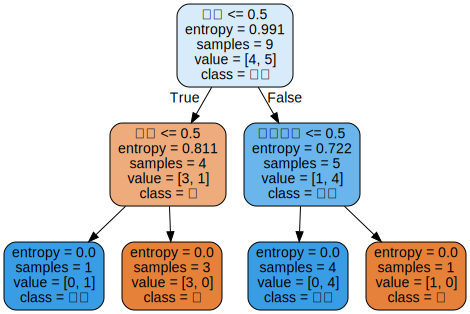

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
# 载入数据
df = pd.read_csv('golf_data.csv')

# 对属性进行编码
encoder = preprocessing.LabelEncoder()
for i in range(0,df.shape[1]):
    df[df.columns[i]] = encoder.fit_transform(df[df.columns[i]])

X = df[["humility","outlook","temp","windy"]]
y = df["play"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

# 定义 ID3 模型（模型参数为："entropy"）
id3_tree = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 30)
id3_tree.fit(X_train, y_train)
pre = id3_tree.predict(X_test)
print(y_test.values)
print(pre)

# 评分
score = id3_tree.score(X_test, y_test)
print(score)

# 画树
import graphviz
dot_data = tree.export_graphviz(id3_tree
                                ,feature_names = ["湿度","天气","温度","是否有风"]
                                ,class_names = ["去", "不去"]
                                ,filled = True
                                ,rounded = True
                               )
graph = graphviz.Source(dot_data)
graph